# sketch test

In [27]:
import matplotlib.pyplot as plt
# path = '/home/yuanying/ece285/project/dataset/Harvard/harvard_0.jpg'
# path = '/home/yuanying/ece285/project/dataset/Princeton/puam_1.jpg'
path = '/home/yuanying/ece285/project/dataset/Metropolitan/met_0.jpg'
# path = '/home/yuanying/ece285/project/dataset/Smithsonian/smithsonian_0.jpg'
img_plt = plt.imread(path)
print("img_plt :",img_plt .shape)
print("img_plt :",type(img_plt ))


img_plt : (512, 512, 3)
img_plt : <class 'numpy.ndarray'>


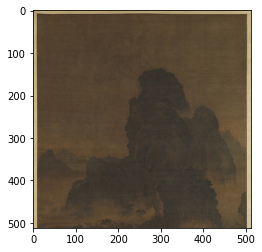

In [28]:
plt.imshow(img_plt , cmap=plt.cm.binary)
plt.show()

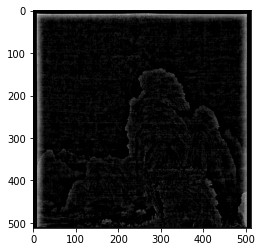

In [29]:
from PIL import Image, ImageFilter, ImageOps
# path = '/home/yuanying/ece285/project/dataset/Princeton/puam_1.jpg'
# path = '/home/yuanying/ece285/project/dataset/Harvard/harvard_0.jpg'
path = '/home/yuanying/ece285/project/dataset/Metropolitan/met_0.jpg'
# path = '/home/yuanying/ece285/project/dataset/Smithsonian/smithsonian_0.jpg'
img = Image.open(path)
 
def dodge(a, b, alpha):
    return min(int(a*255/(256-b*alpha)), 255)
 
    
def draw(img, blur=25, alpha=1.0):
    # 图片转换成灰色
    img1 = img.convert('L')
    img2 = img1.copy()
    img2 = ImageOps.invert(img2)
    # 模糊度
    for i in range(blur):
        img2 = img2.filter(ImageFilter.BLUR)
    width, height = img1.size
    for x in range(width):
        for y in range(height):
            a = img1.getpixel((x, y))
            b = img2.getpixel((x, y))
            img1.putpixel((x, y), dodge(a, b, alpha))
    img1.show()
    plt.imshow(img1 , cmap=plt.cm.binary)
    plt.show()
    img1.save('/home/yuanying/ece285/project/test1.jpg')
 
 
if __name__ == "__main__":
    draw(img)



In [30]:
import cv2
import numpy as np
 
 
def dodgeNaive(image, mask):
    # determine the shape of the input image
    width, height = image.shape[:2]
 
    # prepare output argument with same size as image
    blend = np.zeros((width, height), np.uint8)
 
    for col in range(width):
        for row in range(height):
            # do for every pixel
            if mask[col, row] == 255:
                # avoid division by zero
                blend[col, row] = 255
            else:
                # shift image pixel value by 8 bits
                # divide by the inverse of the mask
                tmp = (image[col, row] << 8) / (255 - mask)
                # print('tmp={}'.format(tmp.shape))
                # make sure resulting value stays within bounds
                if tmp.any() > 255:
                    tmp = 255
                    blend[col, row] = tmp
 
    return blend
 
 
def dodgeV2(image, mask):
    return cv2.divide(image, 255 - mask, scale=256)
 
 
def burnV2(image, mask):
    return 255 - cv2.divide(255 - image, 255 - mask, scale=256)
 
 
def rgb_to_sketch(src_image_name, dst_image_name):
    img_rgb = cv2.imread(src_image_name)
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
    # 读取图片时直接转换操作
    # img_gray = cv2.imread('example.jpg', cv2.IMREAD_GRAYSCALE)
 
    img_gray_inv = 255 - img_gray
    img_blur = cv2.GaussianBlur(img_gray_inv, ksize=(21, 21),
                                sigmaX=0, sigmaY=0)
    img_blend = dodgeV2(img_gray, img_blur)
 
#     cv2.imshow('original', img_rgb)
#     cv2.imshow('gray', img_gray)
#     cv2.imshow('gray_inv', img_gray_inv)
#     cv2.imshow('gray_blur', img_blur)
#     cv2.imshow("pencil sketch", img_blend)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    cv2.imwrite(dst_image_name, img_blend)
 
 
if __name__ == '__main__':
    img_path = '/home/yuanying/ece285/project/dataset/Metropolitan/met_0.jpg'
#     img_path = '/home/yuanying/ece285/project/dataset/Princeton/puam_1.jpg'
#     img_path = '/home/yuanying/ece285/project/dataset/Smithsonian/smithsonian_0.jpg'
    save_path = '/home/yuanying/ece285/project/test2.jpg'
    src_image_name = img_path
    dst_image_name = save_path
    rgb_to_sketch(src_image_name, dst_image_name)

In [18]:
### result not very good~
# img_rgb = cv2.imread(img_path)
# img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
# img_blur = cv2.GaussianBlur(img_gray, ksize=(21, 21),
#                             sigmaX=0, sigmaY=0)
# tp=cv2.divide(img_gray, img_blur, scale=255)
# cv2.imwrite('/home/yuanying/ece285/project/test3.jpg',tp)

True

# prepare data

In [39]:
import os

train_harvard_path = '/home/yuanying/ece285/project/dataset/Harvard/'
train_metropolitan_path = '/home/yuanying/ece285/project/dataset/Metropolitan/'
train_princeton_path = '/home/yuanying/ece285/project/dataset/Princeton/'
train_smithsonian_path = '/home/yuanying/ece285/project/dataset/Smithsonian/'

def getTrain(train_abs_path):
    '''get the name of train pictures here '''
    train_scenes_list = []
    for (root, dirs,files) in os.walk(train_abs_path):
        for filename in files:
            if filename.endswith('jpg'):
                
                train_scenes_list.append(filename)
                
            else:
                pass
    return train_scenes_list
train_harvard_list = getTrain(train_harvard_path)
# print(train_harvard_list)
print(len(train_harvard_list)) #101

train_metropolitan_list = getTrain(train_metropolitan_path)
# print(train_metropolitan_list)
print(len(train_metropolitan_list)) #428

train_princeton_list = getTrain(train_princeton_path)
# print(train_princeton_list)
print(len(train_princeton_list)) #362

train_smithsonian_list = getTrain(train_smithsonian_path)
# print(train_smithsonian_list)
print(len(train_smithsonian_list)) #1301

101
428
362
1301


In [40]:
import cv2
import numpy as np

 
 
def dodgeNaive(image, mask):
    # determine the shape of the input image
    width, height = image.shape[:2]
 
    # prepare output argument with same size as image
    blend = np.zeros((width, height), np.uint8)
 
    for col in range(width):
        for row in range(height):
            # do for every pixel
            if mask[col, row] == 255:
                # avoid division by zero
                blend[col, row] = 255
            else:
                # shift image pixel value by 8 bits
                # divide by the inverse of the mask
                tmp = (image[col, row] << 8) / (255 - mask)
                # print('tmp={}'.format(tmp.shape))
                # make sure resulting value stays within bounds
                if tmp.any() > 255:
                    tmp = 255
                    blend[col, row] = tmp
 
    return blend
 
 
def dodgeV2(image, mask):
    return cv2.divide(image, 255 - mask, scale=256)
 
 
def burnV2(image, mask):
    return 255 - cv2.divide(255 - image, 255 - mask, scale=256)
 
 
def rgb_to_sketch(src_image_name, dst_image_name):
    img_rgb = cv2.imread(src_image_name)
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
    # 读取图片时直接转换操作
    # img_gray = cv2.imread('example.jpg', cv2.IMREAD_GRAYSCALE)
 
    img_gray_inv = 255 - img_gray
    img_blur = cv2.GaussianBlur(img_gray_inv, ksize=(21, 21),
                                sigmaX=0, sigmaY=0)
    img_blend = dodgeV2(img_gray, img_blur)
 
#     cv2.imshow('original', img_rgb)
#     cv2.imshow('gray', img_gray)
#     cv2.imshow('gray_inv', img_gray_inv)
#     cv2.imshow('gray_blur', img_blur)
#     cv2.imshow("pencil sketch", img_blend)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    cv2.imwrite(dst_image_name, img_blend)
 
 


In [44]:
if __name__ == '__main__':
#     img_path = '/home/yuanying/ece285/project/dataset/Harvard/'
#     save_path = '/home/yuanying/ece285/project/sketch/Harvard/'
#     train_data_list = train_harvard_list
    
#     img_path = '/home/yuanying/ece285/project/dataset/Metropolitan/'
#     save_path = '/home/yuanying/ece285/project/sketch/Metropolitan/'
#     train_data_list = train_metropolitan_list
    
#     img_path = '/home/yuanying/ece285/project/dataset/Princeton/'
#     save_path = '/home/yuanying/ece285/project/sketch/Princeton/'
#     train_data_list = train_princeton_list
    
    img_path = '/home/yuanying/ece285/project/dataset/Smithsonian/'
    save_path = '/home/yuanying/ece285/project/sketch/Smithsonian/'
    train_data_list = train_smithsonian_list
    
#     img_path = '/home/yuanying/ece285/project/dataset/Metropolitan/met_0.jpg'
#     img_path = '/home/yuanying/ece285/project/dataset/Princeton/puam_1.jpg'
#     img_path = '/home/yuanying/ece285/project/dataset/Smithsonian/smithsonian_0.jpg'

    for i in range(len(train_data_list)):  
        print('start '+str(i))
        src_image_name = img_path+train_data_list[i]
        dst_image_name = save_path+train_data_list[i]    
        rgb_to_sketch(src_image_name, dst_image_name)
    print('finish all!')

start 0
start 1
start 2
start 3
start 4
start 5
start 6
start 7
start 8
start 9
start 10
start 11
start 12
start 13
start 14
start 15
start 16
start 17
start 18
start 19
start 20
start 21
start 22
start 23
start 24
start 25
start 26
start 27
start 28
start 29
start 30
start 31
start 32
start 33
start 34
start 35
start 36
start 37
start 38
start 39
start 40
start 41
start 42
start 43
start 44
start 45
start 46
start 47
start 48
start 49
start 50
start 51
start 52
start 53
start 54
start 55
start 56
start 57
start 58
start 59
start 60
start 61
start 62
start 63
start 64
start 65
start 66
start 67
start 68
start 69
start 70
start 71
start 72
start 73
start 74
start 75
start 76
start 77
start 78
start 79
start 80
start 81
start 82
start 83
start 84
start 85
start 86
start 87
start 88
start 89
start 90
start 91
start 92
start 93
start 94
start 95
start 96
start 97
start 98
start 99
start 100
start 101
start 102
start 103
start 104
start 105
start 106
start 107
start 108
start 109
start 110
